In [34]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from utils import load_checkpoint, cnn_test_step, mmnn_test_step
import pandas as pd
from dataloader import CustomDataloader
from networks import CNNRegression, MultiModalNetwork
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score




# Model 1 - Linear Regression Analysis

In [35]:

#load pkl files and plot the data
regression_theta = torch.load('tensor_collection\\lr_theta.pt').numpy()
regression_train_loss = torch.load('tensor_collection\\lr_train_losses.pt')
regression_val_loss = torch.load('tensor_collection\\lr_val_losses.pt')
cm_x_test = torch.load('tensor_collection\\lr_x_test.pt')
cm_y_test = torch.load('tensor_collection\\lr_y_test.pt')


Final training loss: 67.57550811767578
Final validation loss: 63.63718795776367


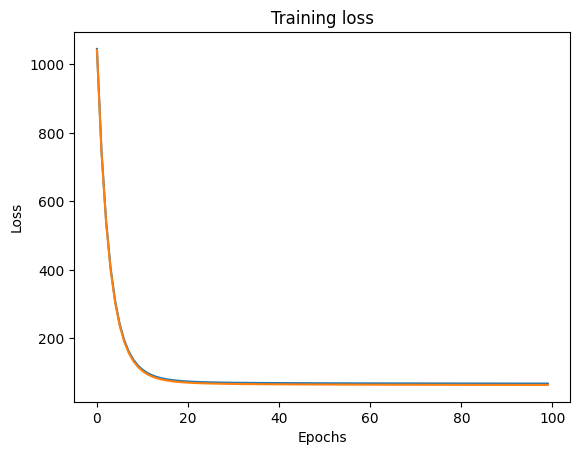

In [36]:
# plot the losses over time
plt.figure(0)
plt.plot(regression_train_loss)
plt.plot(regression_val_loss)
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

print('Final training loss:', regression_train_loss[-1].item())
print('Final validation loss:', regression_val_loss[-1].item())

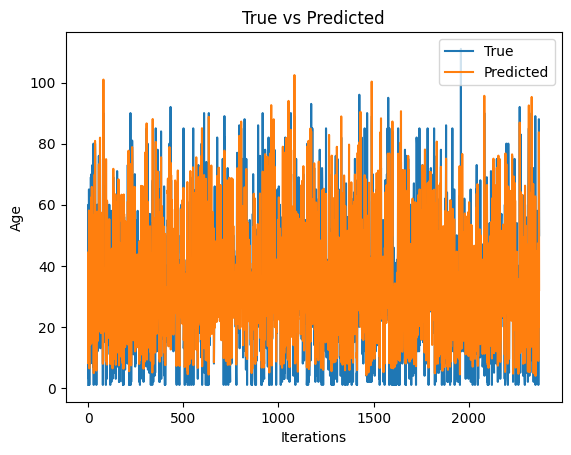

In [37]:
cm_y_hat = cm_x_test @ regression_theta

plt.figure()
plt.plot(cm_y_test)
plt.plot(cm_y_hat)
plt.title('True vs Predicted')
plt.xlabel('Iterations')
plt.ylabel('Age')
plt.legend(['True', 'Predicted'])

In [38]:

predictions = np.array(cm_y_hat)
actuals = np.array(cm_y_test)

mse = mean_squared_error(actuals, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actuals, predictions)
r2 = r2_score(actuals, predictions)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-Squared: {r2}')


MSE: 65.33318196466476
RMSE: 8.082894405141314
MAE: 6.139777797559611
R-Squared: 0.8346184001688388


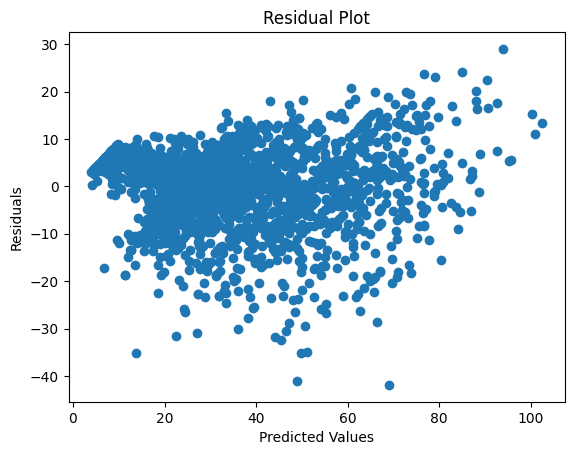

In [39]:
#Residual Plot
plt.figure(2)
plt.scatter(cm_y_hat, cm_y_hat-cm_y_test)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Model 2 - Convolutional Neural Network Analysis

In [40]:
cnn_train_loss = torch.load('tensor_collection\\cnn_train_losses.pt')
cnn_val_loss = torch.load('tensor_collection\\cnn_val_losses.pt')


Final training loss: 178.21283846403423
Final validation loss: 221.39365577697754


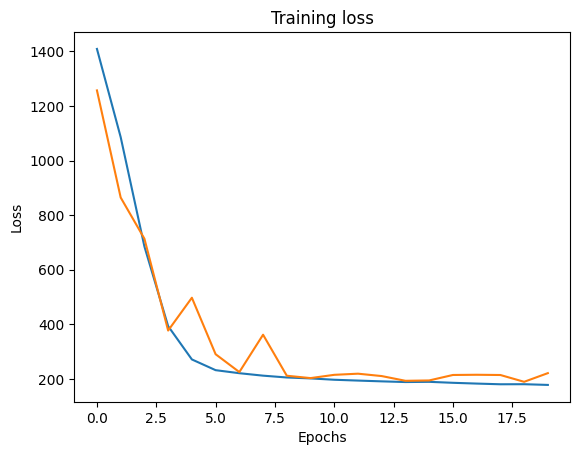

In [41]:
# plot the losses over time
plt.figure(3)
plt.plot(cnn_train_loss)
plt.plot(cnn_val_loss)
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

print('Final training loss:', cnn_train_loss[-1])
print('Final validation loss:', cnn_val_loss[-1])

In [42]:
directory = 'tensor_collection\\'

#load test  files
cnn_x_test = pd.read_csv(directory + 'cnn_x_test.csv')
cnn_y_test_tensor = torch.load(directory + 'cnn_y_test.pt')

print(type(cnn_x_test))
print(type(cnn_y_test_tensor))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [43]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model_cnn = CNNRegression().to(device)

model_cnn, epochs = load_checkpoint('model_checkpoints\\cnn_checkpoint_final.pth', model_cnn)

batch_sz = 64

In [44]:
test_cnn_dataloader = CustomDataloader(dataframe=cnn_x_test, age=cnn_y_test_tensor, batch_size=batch_sz, randomize=False)

In [45]:
model_cnn.eval()  # Set the model to evaluation mode

predictions_cnn = []
actuals_cnn = []

predictions_cnn, actuals_cnn = cnn_test_step(model_cnn, test_cnn_dataloader, device)


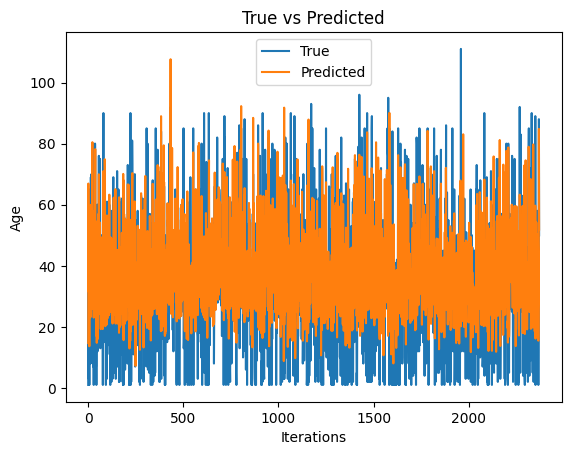

In [46]:
plt.figure()
plt.plot(actuals_cnn)
plt.plot(predictions_cnn)
plt.title('True vs Predicted')
plt.xlabel('Iterations')
plt.ylabel('Age')
plt.legend(['True', 'Predicted'])

In [47]:
# Converting lists to numpy arrays for calculation
predictions_cnn = np.array(predictions_cnn)
actuals_cnn = np.array(actuals_cnn)

mse_cnn = mean_squared_error(actuals_cnn, predictions_cnn)
rmse_cnn = np.sqrt(mse_cnn)
mae_cnn = mean_absolute_error(actuals_cnn, predictions_cnn)
r2_cnn = r2_score(actuals_cnn, predictions_cnn)

print(f'CNN MSE: {mse_cnn}')
print(f'CNN RMSE: {rmse_cnn}')
print(f'CNN MAE: {mae_cnn}')
print(f'CNN R-Squared: {r2_cnn}')

CNN MSE: 199.56297302246094
CNN RMSE: 14.126675605773926
CNN MAE: 11.034979820251465
CNN R-Squared: 0.4948348612204584


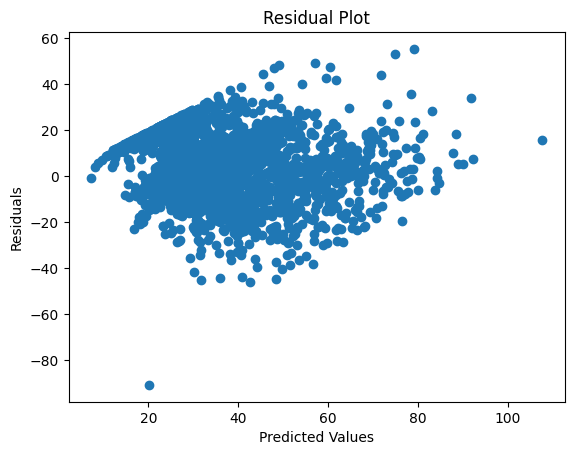

In [48]:
#Residual Plot
plt.figure(4)
plt.scatter(predictions_cnn, predictions_cnn-actuals_cnn)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

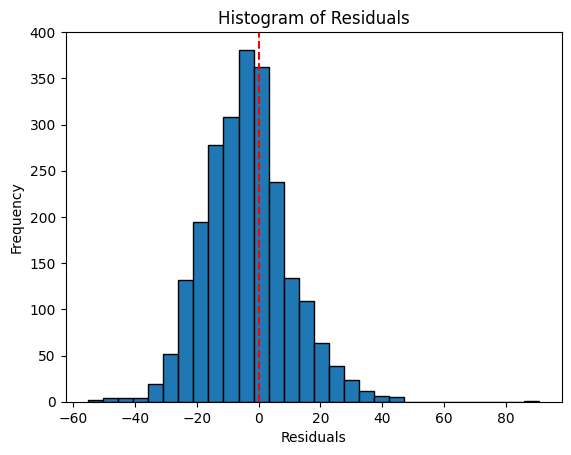

In [49]:
residuals = actuals_cnn - predictions_cnn

# Plot histogram of residuals
plt.figure(5)
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.axvline(x=0, color='red', linestyle='--')  # Add a line at x=0 for reference
plt.show()

# Model 3 - Multi Modal Neural Network - Analysis

In [50]:
mmnn_train_loss = torch.load('tensor_collection\\mmnn_train_losses.pt')
mmnn_val_loss = torch.load('tensor_collection\\mmnn_val_losses.pt')

Final training loss: 107.53331367091128
Final validation loss: 200.2986218134562


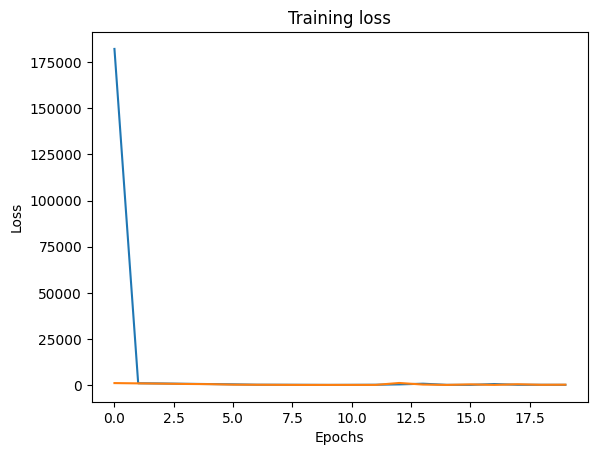

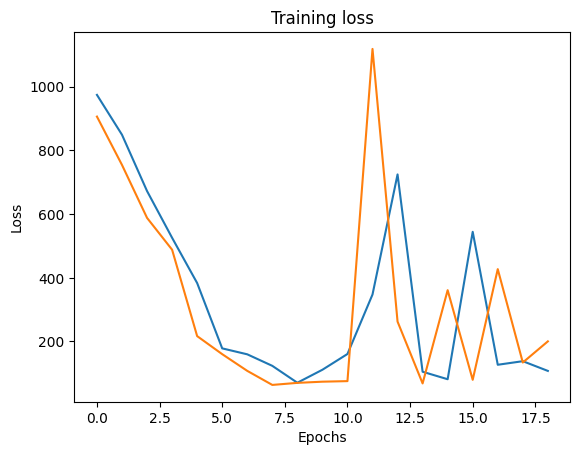

In [51]:
plt.figure(6)
plt.plot(mmnn_train_loss)
plt.plot(mmnn_val_loss)
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# plot the losses over time
plt.figure(7)
plt.plot(mmnn_train_loss[1:])
plt.plot(mmnn_val_loss[1:])
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

print('Final training loss:', mmnn_train_loss[-1])
print('Final validation loss:', mmnn_val_loss[-1])

In [52]:
directory = 'tensor_collection\\'
mmnn_x_test = pd.read_csv(directory + 'mmnn_x_test.csv')
mmnn_y_test_tensor = torch.load(directory + 'mmnn_y_test.pt')

print(type(mmnn_x_test))
print(type(mmnn_y_test_tensor))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [53]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_numerical_features = mmnn_x_test.shape[1] - 1 # -1 because we don't count the filename column
model_mmnn = MultiModalNetwork(num_numerical_features).to(device)
model_mmnn, epochs = load_checkpoint('model_checkpoints\\mmnn_checkpoint_final.pth', model_mmnn)
batch_sz = 64

In [54]:
test_mmnn_dataloader = CustomDataloader(dataframe=mmnn_x_test, age=mmnn_y_test_tensor, batch_size=batch_sz, randomize=False)

In [55]:
model_mmnn.eval()  

predictions_mmnn = []
actuals_mmnn = []

predictions_mmnn, actuals_mmnn = mmnn_test_step(model_mmnn, test_mmnn_dataloader, device)


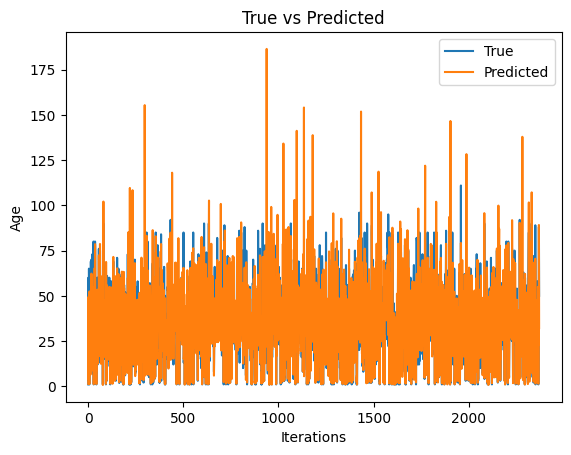

In [56]:
plt.figure()
plt.plot(actuals_mmnn)
plt.plot(predictions_mmnn)
plt.title('True vs Predicted')
plt.xlabel('Iterations')
plt.ylabel('Age')
plt.legend(['True', 'Predicted'])

In [57]:
# Converting lists to numpy arrays for calculation
predictions_mmnn = np.array(predictions_mmnn)
actuals_mmnn = np.array(actuals_mmnn)

mse_mmnn = mean_squared_error(actuals_mmnn, predictions_mmnn)
rmse_mmnn = np.sqrt(mse_mmnn)
mae_mmnn = mean_absolute_error(actuals_mmnn, predictions_mmnn)
r2_mmnn = r2_score(actuals_mmnn, predictions_mmnn)

print(f'Multi Modal Network MSE: {mse_mmnn}')
print(f'Multi Modal Network RMSE: {rmse_mmnn}')
print(f'Multi Modal Network MAE: {mae_mmnn}')
print(f'Multi Modal Network R-Squared: {r2_mmnn}')

Multi Modal Network MSE: 138.1319122314453
Multi Modal Network RMSE: 11.75295352935791
Multi Modal Network MAE: 6.7407941818237305
Multi Modal Network R-Squared: 0.6503388177786126


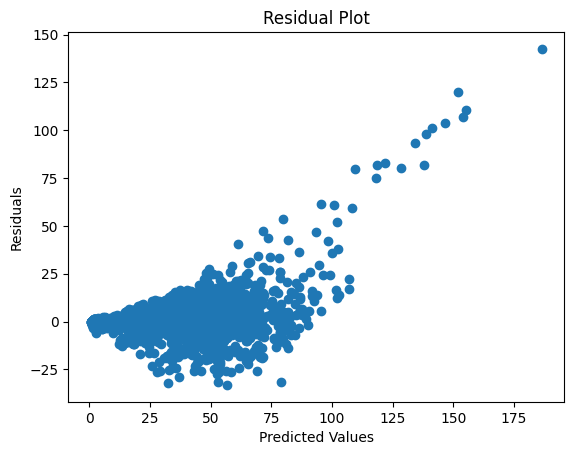

In [58]:
#Residual Plot
plt.figure(8)
plt.scatter(predictions_mmnn, predictions_mmnn-actuals_mmnn)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

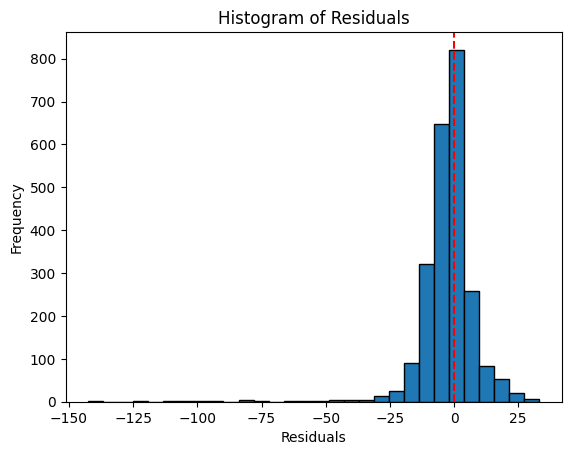

In [59]:
residuals = actuals_mmnn - predictions_mmnn

# Plot histogram of residuals
plt.figure(5)
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.axvline(x=0, color='red', linestyle='--')  # Add a line at x=0 for reference
plt.show()